In [29]:
import json
import numpy as np
import matplotlib.pyplot as plt
import os

In [12]:
base_dir = "/Users/erikpoppleton/Simulations/filament/"

with open(base_dir+f'WT/h1_2.json') as f:
    data = json.load(f)
    wt_occupancy = data["occupancy"]

with open(base_dir+f'spi/h1_0.json') as f:
    data = json.load(f)
    spi_occupancy = data["occupancy"]

with open(base_dir+f'ribo/h1_1.json') as f:
    data = json.load(f)
    ribo_occupancy = data["occupancy"]

In [16]:
l_wt = 258
l_spi = 316
l_ribo = 304

In [27]:
wt_1_tile = np.mean(np.reshape(wt_occupancy, (int(len(wt_occupancy)/l_wt), l_wt)), axis=0)
spi_1_tile = np.mean(np.reshape(spi_occupancy, (int(len(spi_occupancy)/l_spi), l_spi)), axis=0)
ribo_1_tile = np.mean(np.reshape(ribo_occupancy, (int(len(ribo_occupancy)/l_ribo), l_ribo)), axis=0)

In [28]:
with open(base_dir+'wt/h1_mean.json', 'w+') as f:
    json.dump({"occupancy" : wt_1_tile.tolist()}, f)
    
with open(base_dir+'spi/h1_mean.json', 'w+') as f:
    json.dump({"occupancy" : spi_1_tile.tolist()}, f)

with open(base_dir+'ribo/h1_mean.json', 'w+') as f:
    json.dump({"occupancy" : ribo_1_tile.tolist()}, f)

In [52]:
wt_h1_data = []
for fname in os.listdir(base_dir+'WT/h1_angles/'):
    with open(base_dir+'WT/h1_angles/'+fname, 'r') as f:
        helix_data = json.load(f)
        wt_h1_data += helix_data['4-132']

spi_h1_data = []
for fname in os.listdir(base_dir+'spi/h1_angles/'):
    with open(base_dir+'spi/h1_angles/'+fname, 'r') as f:
        helix_data = json.load(f)
        spi_h1_data += helix_data['62-190']

ribo_h1_data = []
for fname in os.listdir(base_dir+'ribo/h1_angles/'):
    with open(base_dir+'ribo/h1_angles/'+fname, 'r') as f:
        helix_data = json.load(f)
        ribo_h1_data += helix_data['54-186']

In [53]:
wt_h1_data = [x for x in wt_h1_data if x != 'NaN']
wt_h1_data = np.array(wt_h1_data)

spi_h1_data = [x for x in spi_h1_data if x != 'NaN']
spi_h1_data = np.array(spi_h1_data)

ribo_h1_data = [x for x in ribo_h1_data if x != 'NaN']
ribo_h1_data = np.array(ribo_h1_data)


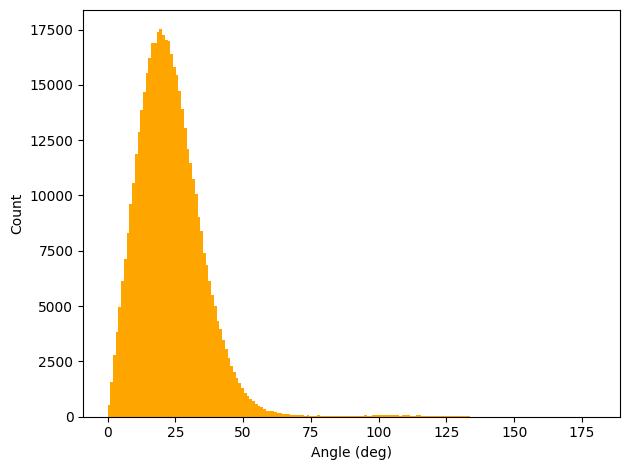

In [76]:
fig, ax = plt.subplots()
bins = np.linspace(0, 180, 180)
ax.hist(wt_h1_data, bins, alpha=1, color='orange')
ax.set_xlabel('Angle (deg)')
ax.set_ylabel('Count')
plt.tight_layout()
plt.savefig('wt_h1_angle.png', dpi=300)

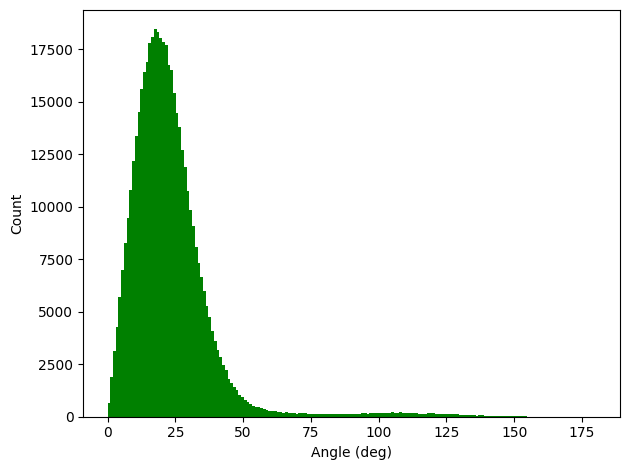

In [77]:
fig, ax = plt.subplots()
bins = np.linspace(0, 180, 180)
ax.hist(spi_h1_data, bins, alpha=1, color='green')
ax.set_xlabel('Angle (deg)')
ax.set_ylabel('Count')
plt.tight_layout()
plt.savefig('spi_h1_angle.png', dpi=300)

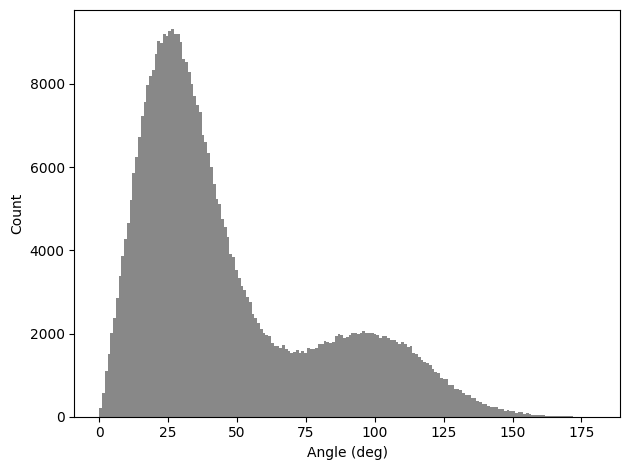

In [78]:
fig, ax = plt.subplots()
bins = np.linspace(0, 180, 180)
ax.hist(ribo_h1_data, bins, alpha=1, color='#888888')
ax.set_xlabel('Angle (deg)')
ax.set_ylabel('Count')
plt.tight_layout()
plt.savefig('ribo_h1_angle.png', dpi=300)